In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import plotly.express as px
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

In [2]:
data = pd.read_csv('CC GENERAL.csv')
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [4]:
numerical_features = ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']

In [5]:
def plot_distribution(feature):
    sns.displot(x=feature, data=data, kde=True, color='#244747');
    plt.figtext(0.2, 1, '%s Distribution'%feature, fontfamily='serif', fontsize=17, fontweight='bold');

def plot_num_cat(feature, target, figsize=None):
    fig = plt.figure(figsize=(15,6))

    for value in data[target].unique():
        sns.kdeplot(data[data[target]==value][feature])

    fig.legend(labels=data[target].unique())
    plt.title('{} distribution based on {}'.format(feature, target))
    plt.show()
    
def plot_num_num(feature, target):
    sns.regplot(x=feature, y=target, data=data, color='#244747')
    plt.show()
    
def plot_cat_cat(feature, target):
    plot_data = data.groupby([feature, target])[feature].agg({'count'}).reset_index()

    fig = px.sunburst(plot_data, path=[feature, target], values='count', #color_continuous_scale='gray', color=feature, 
                      title='Affect of {} on Customer {}'.format(feature, target), width = 600, height = 600)
    
    fig.update_layout(plot_bgcolor='white', title_font_family='Calibri Black', title_font_color='#221f1f', 
                      title_font_size=22, title_x=0.5)
    fig.update_traces(textinfo = 'label + percent parent')
    fig.show()

In [7]:
df = data.copy()
skewed_features = ['BALANCE', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS']
for feature in skewed_features:
    data[feature] = np.log(1+df[feature])

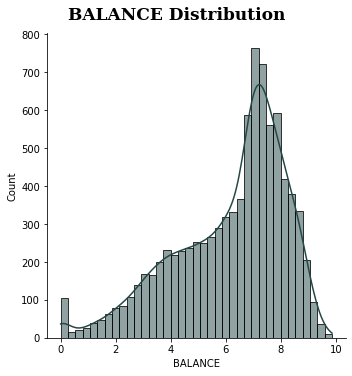

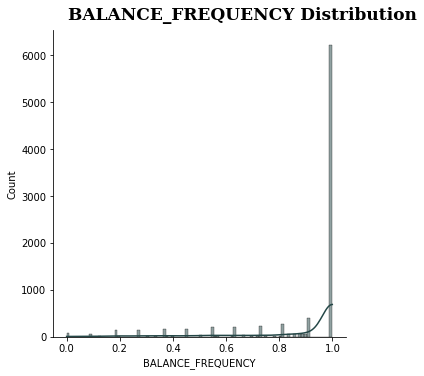

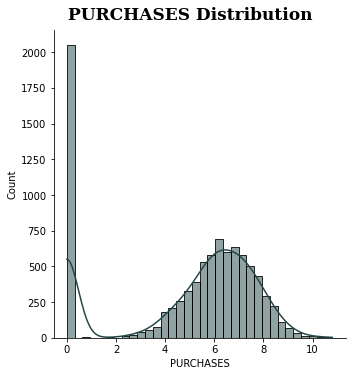

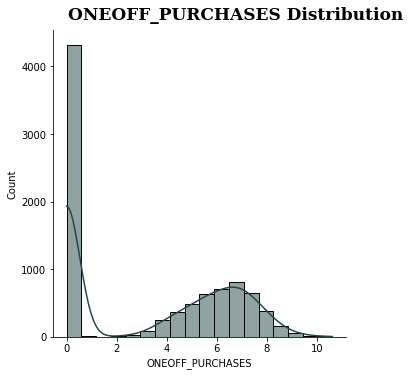

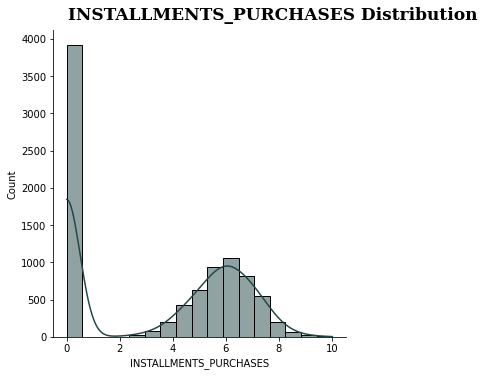

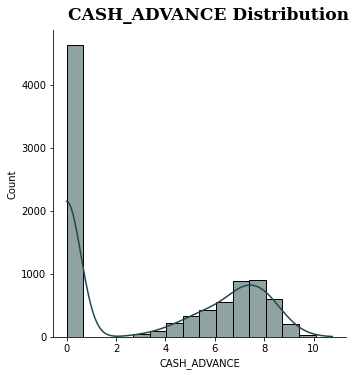

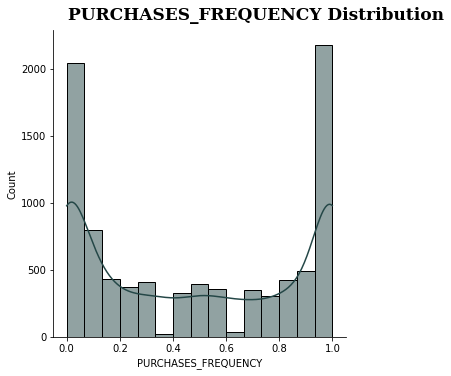

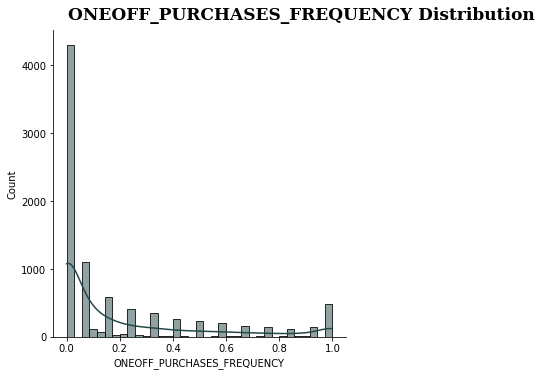

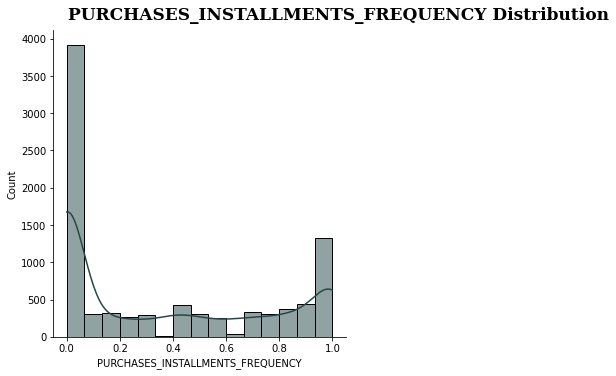

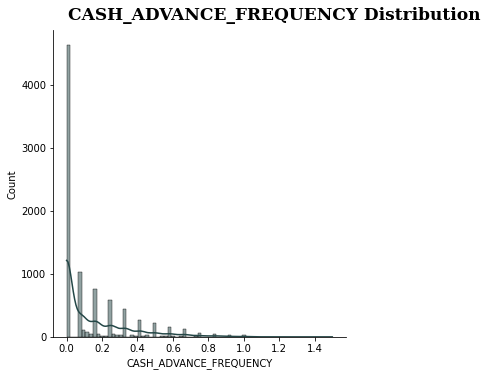

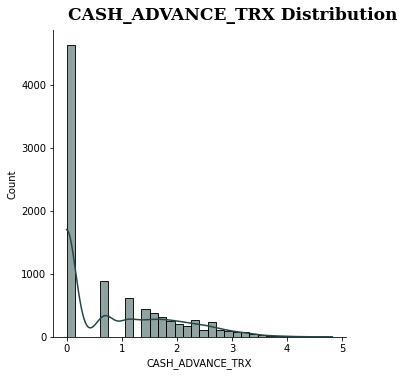

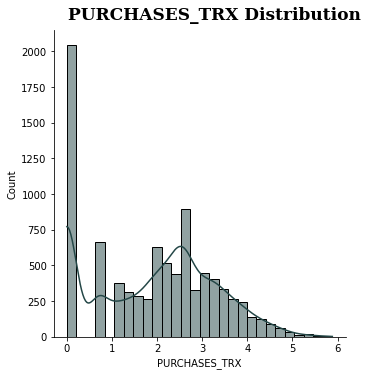

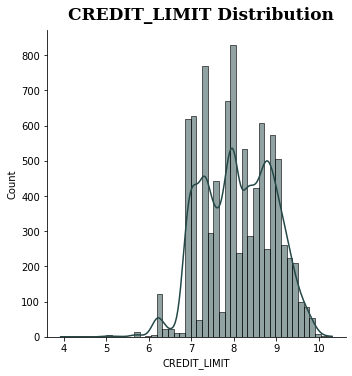

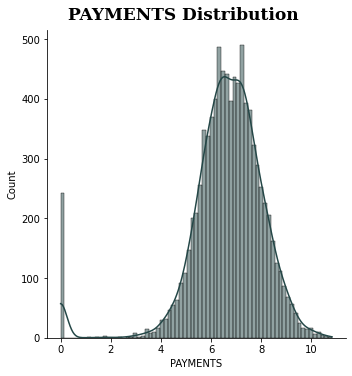

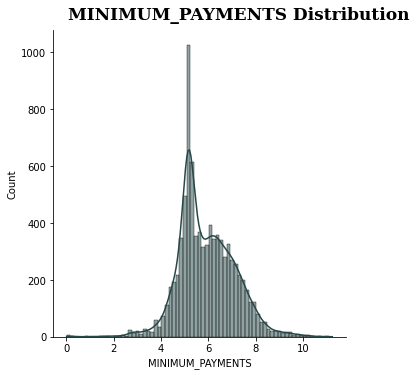

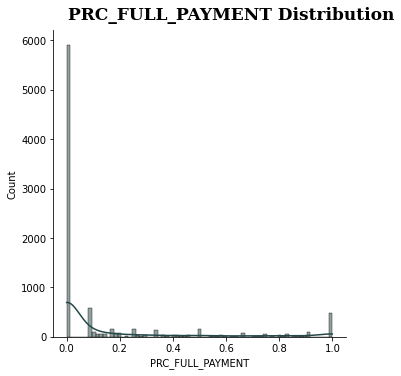

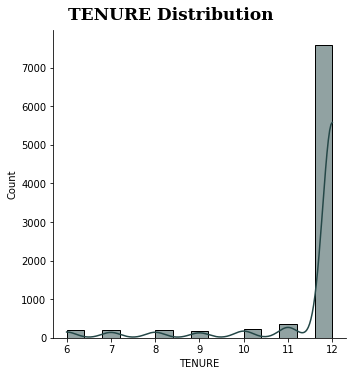

In [8]:
for feature in numerical_features:
    plot_distribution(feature)

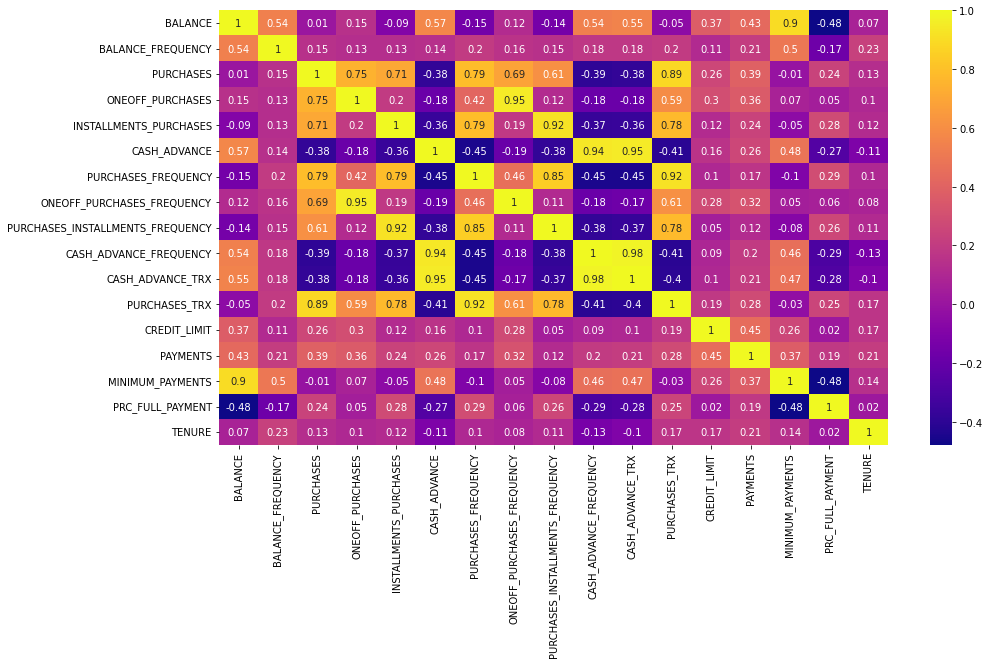

In [14]:
plt.figure(figsize=(15, 8))
sns.heatmap(round(data[numerical_features].corr(method='spearman'), 2), 
            annot=True, mask=None, cmap='plasma')
plt.show()

In [10]:
corr_mat = data[numerical_features].corr()
corr_mat = corr_mat.unstack()
corr_mat = corr_mat.sort_values(kind="quicksort").drop_duplicates()
corr_mat[corr_mat>0.5]

PURCHASES_FREQUENCY               ONEOFF_PURCHASES_FREQUENCY          0.501343
CASH_ADVANCE_TRX                  BALANCE                             0.504146
CASH_ADVANCE                      BALANCE                             0.521648
PURCHASES                         ONEOFF_PURCHASES_FREQUENCY          0.547315
ONEOFF_PURCHASES                  PURCHASES_TRX                       0.574393
PURCHASES                         PURCHASES_INSTALLMENTS_FREQUENCY    0.592411
ONEOFF_PURCHASES_FREQUENCY        PURCHASES_TRX                       0.608430
BALANCE                           BALANCE_FREQUENCY                   0.652592
PURCHASES                         ONEOFF_PURCHASES                    0.683510
                                  INSTALLMENTS_PURCHASES              0.685390
PURCHASES_INSTALLMENTS_FREQUENCY  PURCHASES_TRX                       0.759533
ONEOFF_PURCHASES                  ONEOFF_PURCHASES_FREQUENCY          0.769934
CASH_ADVANCE                      CASH_ADVANCE_FREQU

In [15]:
df.isna().sum()*100/len(df)

CUST_ID                             0.000000
BALANCE                             0.000000
BALANCE_FREQUENCY                   0.000000
PURCHASES                           0.000000
ONEOFF_PURCHASES                    0.000000
INSTALLMENTS_PURCHASES              0.000000
CASH_ADVANCE                        0.000000
PURCHASES_FREQUENCY                 0.000000
ONEOFF_PURCHASES_FREQUENCY          0.000000
PURCHASES_INSTALLMENTS_FREQUENCY    0.000000
CASH_ADVANCE_FREQUENCY              0.000000
CASH_ADVANCE_TRX                    0.000000
PURCHASES_TRX                       0.000000
CREDIT_LIMIT                        0.011173
PAYMENTS                            0.000000
MINIMUM_PAYMENTS                    3.497207
PRC_FULL_PAYMENT                    0.000000
TENURE                              0.000000
dtype: float64

In [17]:
cat_columns = df.select_dtypes(include='object').columns
print('Categorical columns: \n', cat_columns)
print('-' * 30)
cont_columns = df.select_dtypes(exclude='object').columns
print('Continous columns: \n', cont_columns, '\n their count is ', len(cont_columns))

Categorical columns: 
 Index(['CUST_ID'], dtype='object')
------------------------------
Continous columns: 
 Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object') 
 their count is  17


In [18]:
from sklearn.impute import KNNImputer

imputer = KNNImputer()
df[cont_columns] = imputer.fit_transform(df[cont_columns])

In [19]:
df.isna().sum()*100/len(df)

CUST_ID                             0.0
BALANCE                             0.0
BALANCE_FREQUENCY                   0.0
PURCHASES                           0.0
ONEOFF_PURCHASES                    0.0
INSTALLMENTS_PURCHASES              0.0
CASH_ADVANCE                        0.0
PURCHASES_FREQUENCY                 0.0
ONEOFF_PURCHASES_FREQUENCY          0.0
PURCHASES_INSTALLMENTS_FREQUENCY    0.0
CASH_ADVANCE_FREQUENCY              0.0
CASH_ADVANCE_TRX                    0.0
PURCHASES_TRX                       0.0
CREDIT_LIMIT                        0.0
PAYMENTS                            0.0
MINIMUM_PAYMENTS                    0.0
PRC_FULL_PAYMENT                    0.0
TENURE                              0.0
dtype: float64

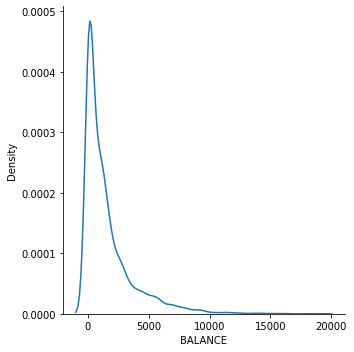

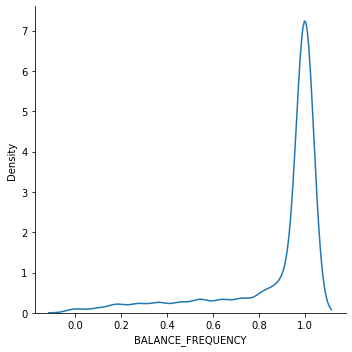

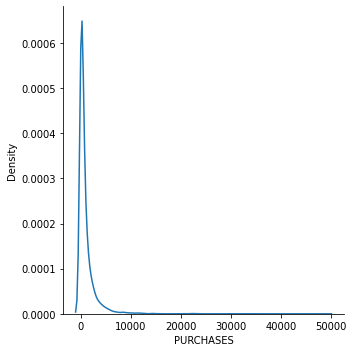

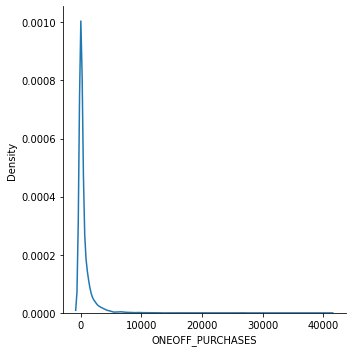

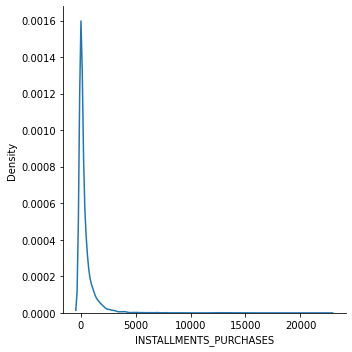

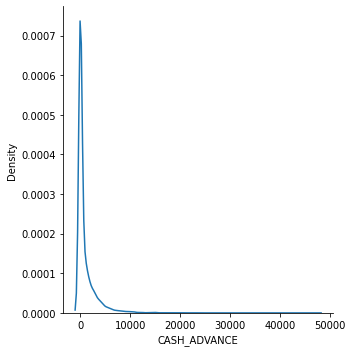

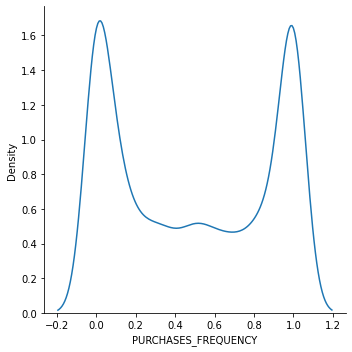

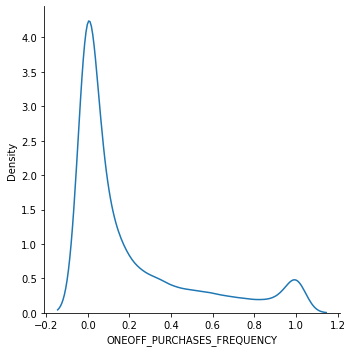

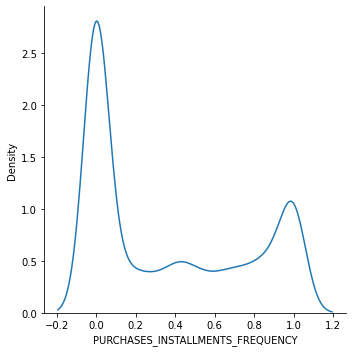

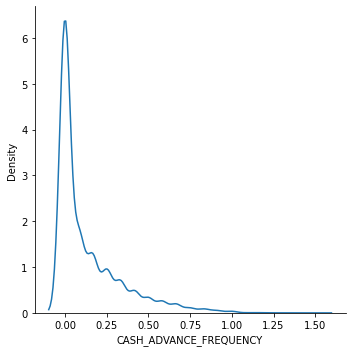

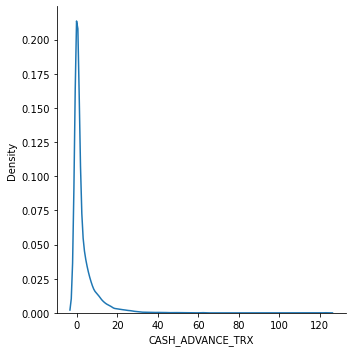

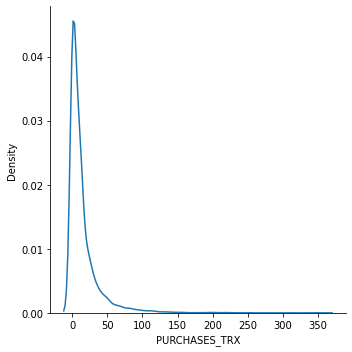

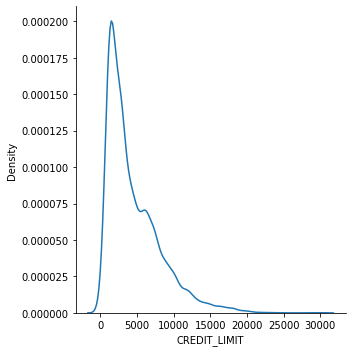

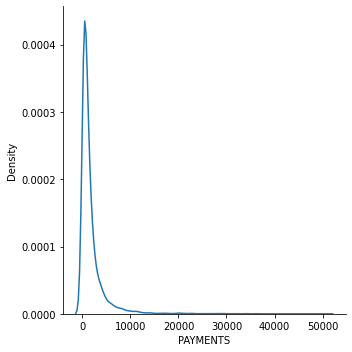

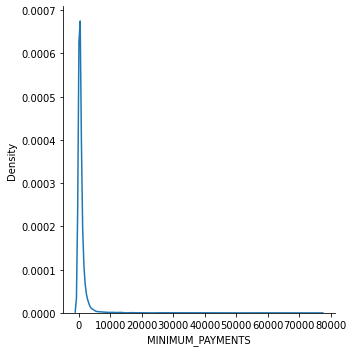

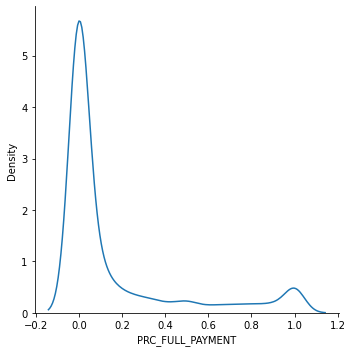

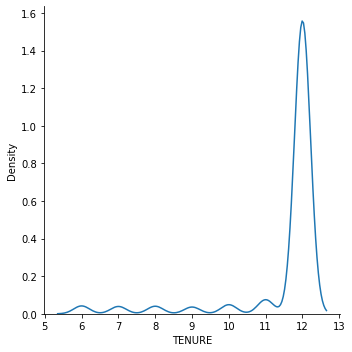

In [20]:
for col in cont_columns:
    sns.displot(x=df[col], kind="kde")
    plt.show()

In [21]:
for col in cont_columns:
    df[col]= np.log(1 + df[col])

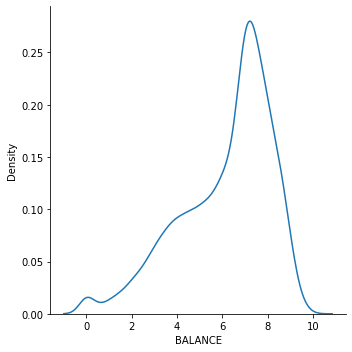

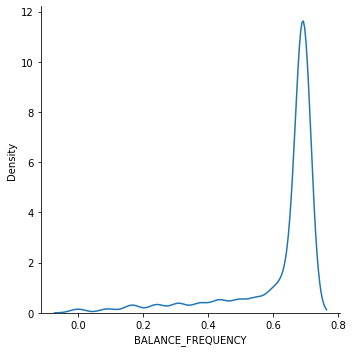

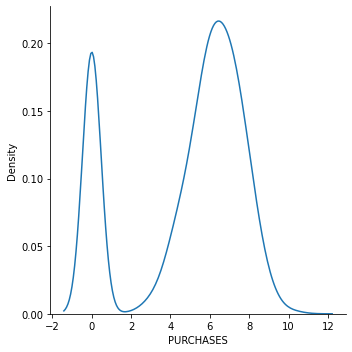

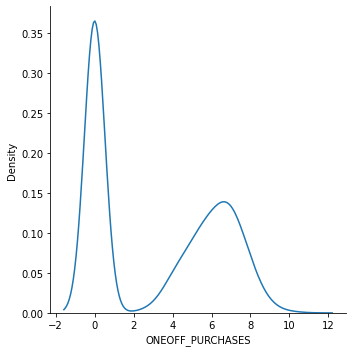

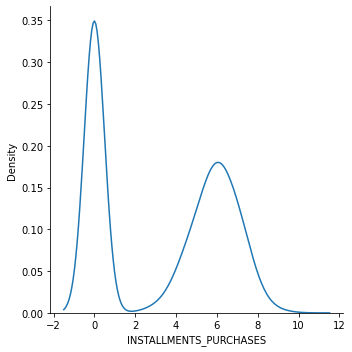

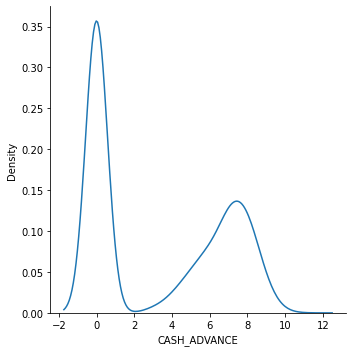

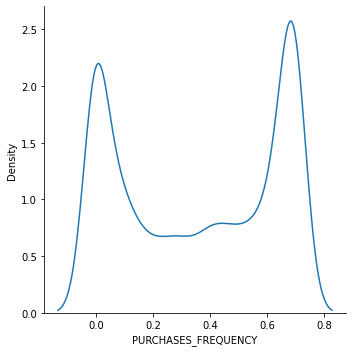

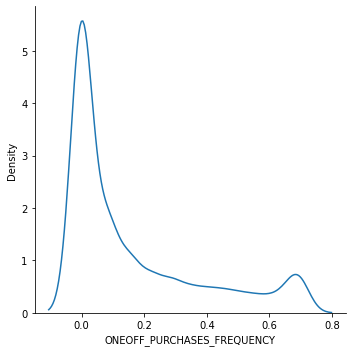

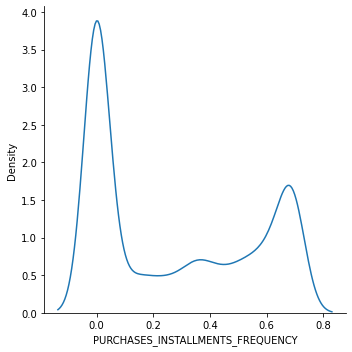

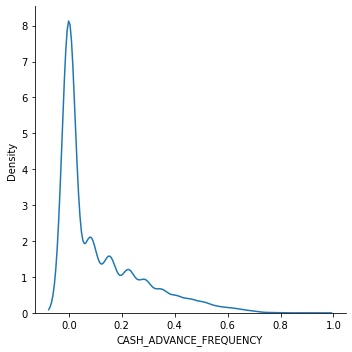

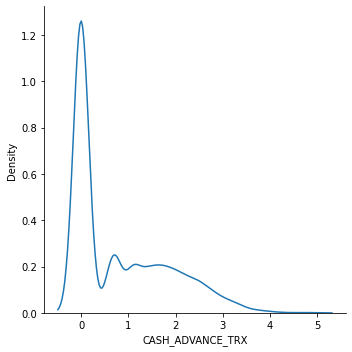

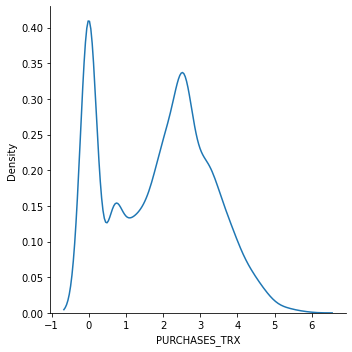

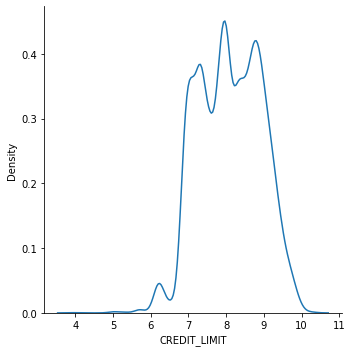

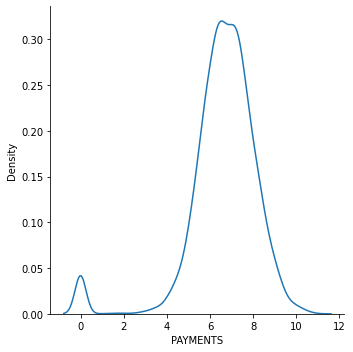

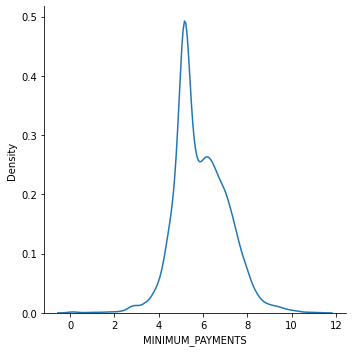

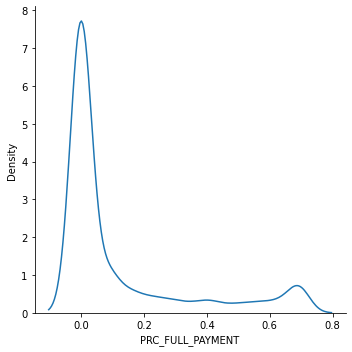

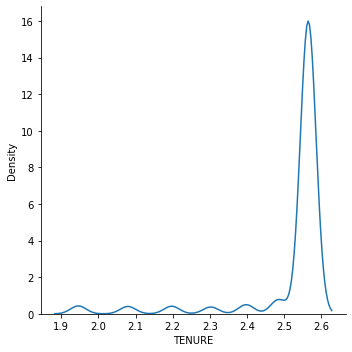

In [22]:
for col in cont_columns:
    sns.displot(x=df[col], kind="kde")
    plt.show()

In [24]:
data = df[cont_columns]
data.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

In [25]:
from sklearn.cluster import KMeans

clusters = 20
square_distance = []
for i in range(1,clusters):
    KM_model = KMeans(i, init='k-means++', n_init=15, max_iter=400)
    KM_model.fit(data)
    square_distance.append(KM_model.inertia_)
    
square_distance

[475860.6192189207,
 295623.2169824625,
 217629.52716409235,
 163359.15662674932,
 131992.31673055334,
 112715.31733630123,
 99876.09406466334,
 92283.35194356882,
 85701.68198874762,
 80765.89553263679,
 75561.63757379263,
 72789.39406722564,
 69690.55129415667,
 66864.01434565814,
 64785.712986752216,
 62795.42438395442,
 60670.95247415484,
 59083.22493617085,
 57749.27457210742]

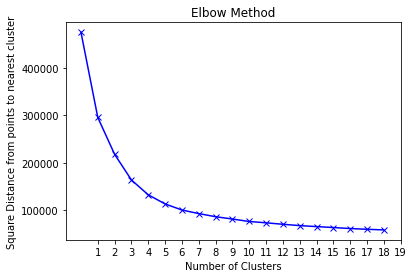

In [26]:
ax , fig = plt.subplots()
ax = plt.plot(square_distance , 'bx-')
plt.xticks(range(1,20,1))
plt.xlabel("Number of Clusters")
plt.ylabel("Square Distance from points to nearest cluster")
plt.title("Elbow Method")
plt.show()

In [27]:
from sklearn.metrics import silhouette_score

sil_scores = []
for i in range(2,20):
    KM_model = KMeans(i, init='k-means++', n_init=15, max_iter=400)
    KM_model.fit(data)
    sil_scores.append(round(silhouette_score(data , KM_model.labels_),4))

print(sil_scores)

[0.3653, 0.377, 0.3997, 0.4242, 0.4375, 0.4559, 0.4123, 0.3472, 0.31, 0.3054, 0.2919, 0.2947, 0.2791, 0.2747, 0.2634, 0.254, 0.2515, 0.2557]


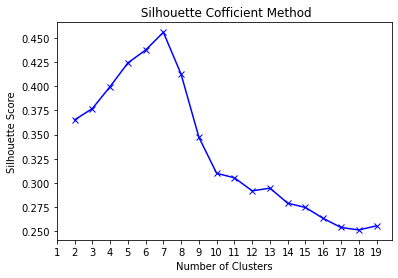

In [28]:
ax , fig = plt.subplots()
ax = plt.plot(range(2,20) , sil_scores , 'bx-')
plt.xticks(range(1,20,1))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title(" Silhouette Cofficient Method")
plt.show()

In [29]:
KM_model = KMeans(2, init='k-means++', n_init=15, max_iter=400)
KM_model.fit(data)

KMeans(max_iter=400, n_clusters=2, n_init=15)

In [30]:
clustered_data = pd.concat( [data,pd.DataFrame({'Cluster':KM_model.labels_})] , axis=1)
clustered_data.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
0,3.735304,0.597837,4.568506,0.000000,4.568506,0.000000,0.154151,0.000000,0.080042,0.000000,0.000000,1.098612,6.908755,5.312231,4.945277,0.000000,2.564949,1
1,8.071989,0.646627,0.000000,0.000000,0.000000,8.770896,0.000000,0.000000,0.000000,0.223144,1.609438,0.000000,8.853808,8.319725,6.978531,0.200671,2.564949,0
2,7.822504,0.693147,6.651791,6.651791,0.000000,0.000000,0.693147,0.693147,0.000000,0.000000,0.000000,2.564949,8.922792,6.434654,6.442994,0.000000,2.564949,1
3,7.419183,0.492477,7.313220,7.313220,0.000000,5.331694,0.080042,0.080042,0.000000,0.080042,0.693147,0.693147,8.922792,0.000000,5.942353,0.000000,2.564949,1
4,6.707735,0.693147,2.833213,2.833213,0.000000,0.000000,0.080042,0.080042,0.000000,0.000000,0.000000,0.693147,7.090910,6.521114,5.504483,0.000000,2.564949,1


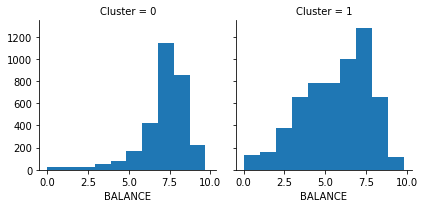

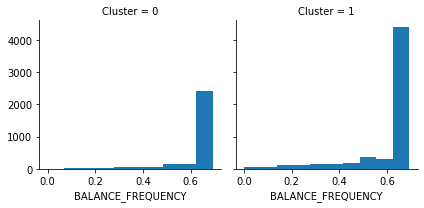

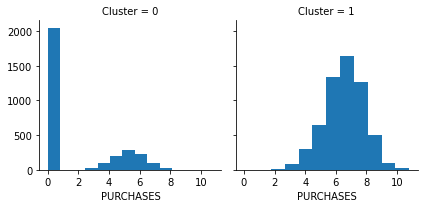

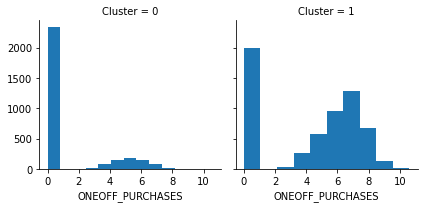

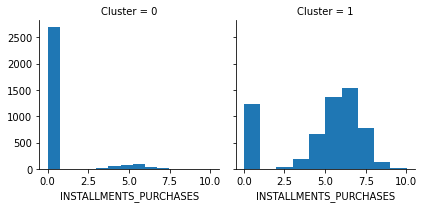

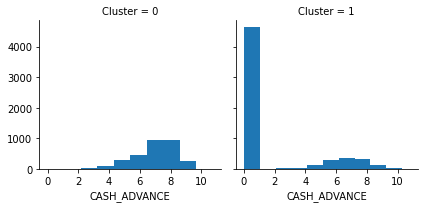

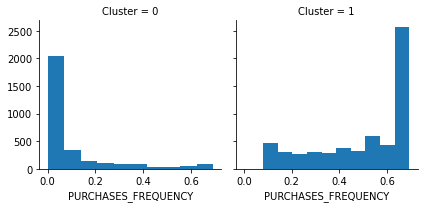

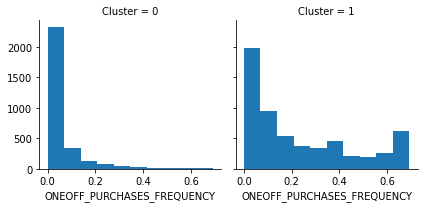

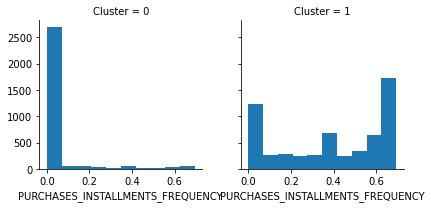

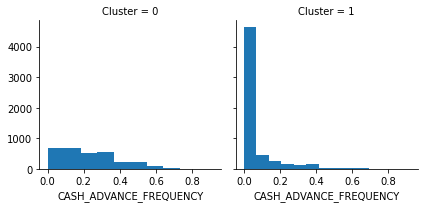

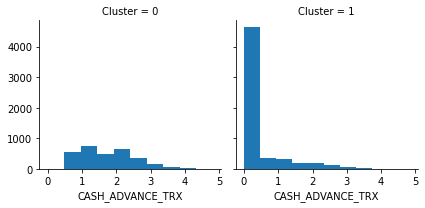

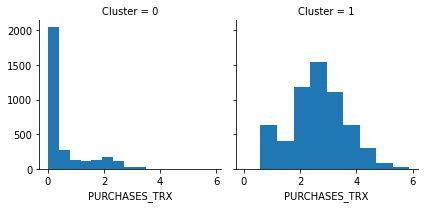

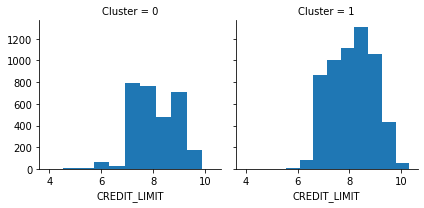

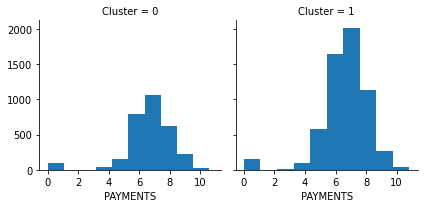

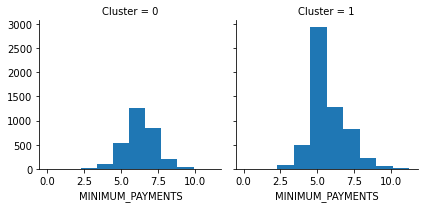

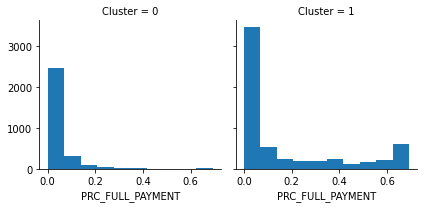

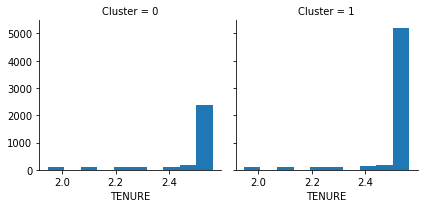

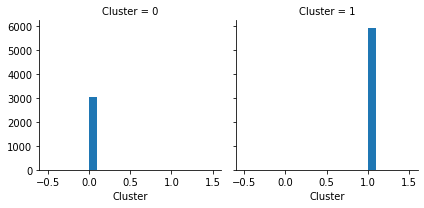

In [31]:
for c in clustered_data:
    grid = sns.FacetGrid(clustered_data, col='Cluster')
    grid.map(plt.hist, c)

In [32]:
for col in cont_columns:
    clustered_data[col] = np.exp(clustered_data[col])
clustered_data.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
0,41.900749,1.818182,96.40,1.00,96.4,1.000000,1.166667,1.000000,1.083333,1.000000,1.0,3.0,1001.0,202.802084,140.509787,1.000000,13.0,1
1,3203.467416,1.909091,1.00,1.00,1.0,6443.945483,1.000000,1.000000,1.000000,1.250000,5.0,1.0,7001.0,4104.032597,1073.340217,1.222222,13.0,0
2,2496.148862,2.000000,774.17,774.17,1.0,1.000000,2.000000,2.000000,1.000000,1.000000,1.0,13.0,7501.0,623.066742,628.284787,1.000000,13.0,1
3,1667.670542,1.636364,1500.00,1500.00,1.0,206.788017,1.083333,1.083333,1.000000,1.083333,2.0,2.0,7501.0,1.000000,380.829982,1.000000,13.0,1
4,818.714335,2.000000,17.00,17.00,1.0,1.000000,1.083333,1.083333,1.000000,1.000000,1.0,2.0,1201.0,679.334763,245.791237,1.000000,13.0,1


In [33]:
from sklearn.decomposition import PCA
pca = PCA(2)
pca.fit(clustered_data)
DR_clustered_data = pca.transform(clustered_data)
DR_clustered_data.shape

(8950, 2)

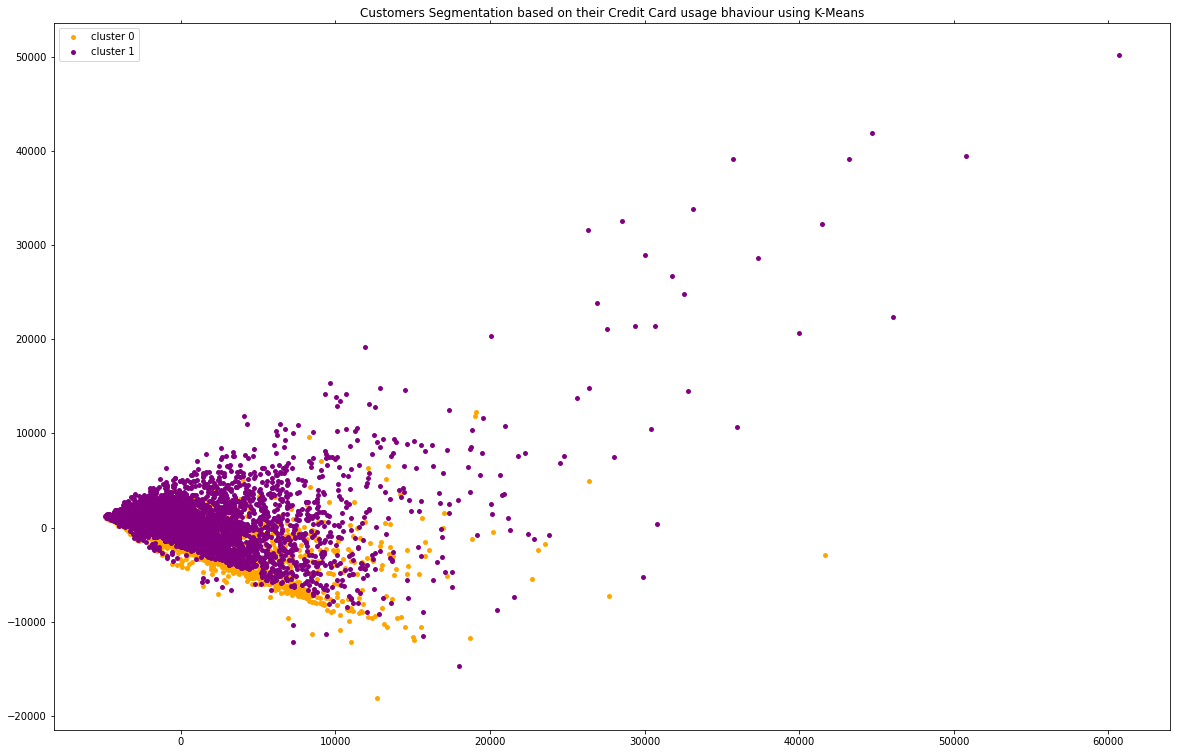

In [34]:
x, y = DR_clustered_data[:, 0], DR_clustered_data[:, 1]

colors = {0: 'orange',
          1: 'purple'}
       

names = {0: 'cluster 0', 
         1: 'cluster 1'}
   
  
df_vis = pd.DataFrame({'x': x, 'y':y, 'label':KM_model.labels_}) 
groups = df_vis.groupby('label')

fig, ax = plt.subplots(figsize=(20, 13)) 

for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=5,
            color=colors[name],label=names[name], mec='none')
    ax.set_aspect('auto')
    ax.tick_params(axis='x',which='both',bottom='off',top='off',labelbottom='off')
    ax.tick_params(axis= 'y',which='both',left='off',top='off',labelleft='off')
    
ax.legend()
ax.set_title("Customers Segmentation based on their Credit Card usage bhaviour using K-Means")
plt.show()

In [35]:
pca = PCA(2)
pca.fit(data)
DR_data = pca.transform(data)
DR_data.shape
DR_data = pd.DataFrame(DR_data)
DR_data.columns= ['Feature1','Feature2']

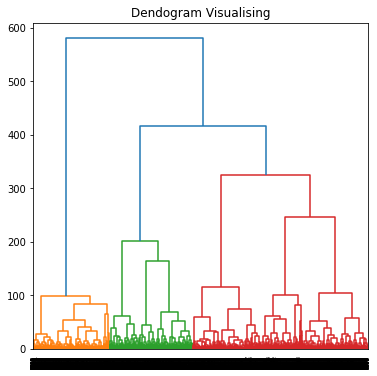

In [36]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize =(6, 6)) 
plt.title('Dendogram Visualising') 
Dendrogram = shc.dendrogram((shc.linkage(data, method ='ward'))) 

In [37]:
from sklearn.cluster import AgglomerativeClustering

sil_scores = []
for i in range(2,20):
    HC_model = AgglomerativeClustering(n_clusters = i)
    HC_model.fit(data)
    sil_scores.append(round(silhouette_score(data , HC_model.labels_),4))

print(sil_scores)

[0.3689, 0.3697, 0.3906, 0.4126, 0.4279, 0.448, 0.3973, 0.3569, 0.3631, 0.2803, 0.2886, 0.2849, 0.2763, 0.2543, 0.2581, 0.2443, 0.2338, 0.2373]


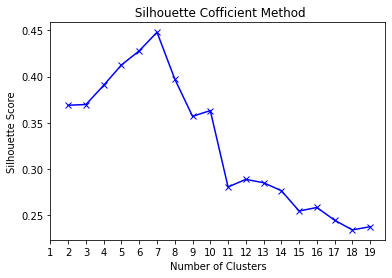

In [38]:
ax , fig = plt.subplots()
ax = plt.plot(range(2,20) , sil_scores , 'bx-')
plt.xticks(range(1,20,1))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title(" Silhouette Cofficient Method")
plt.show()

In [39]:
HC_Model = AgglomerativeClustering(n_clusters = 2)
HC_Model.fit(data)

AgglomerativeClustering()

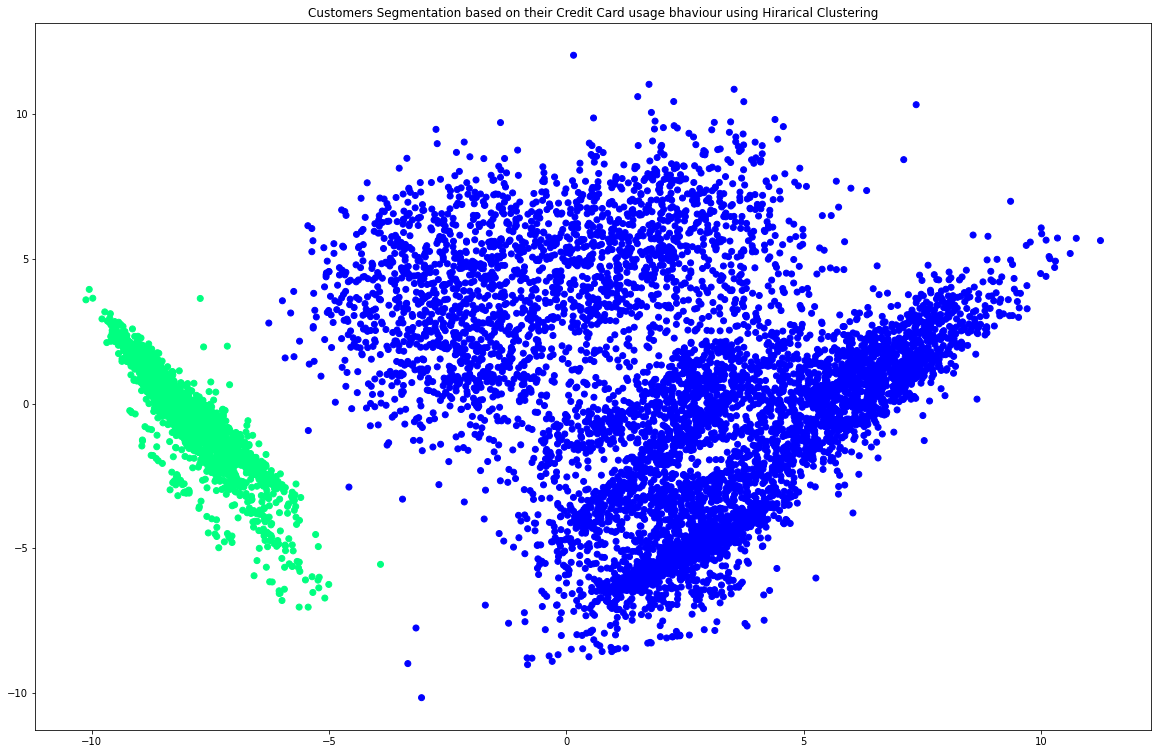

In [40]:
fig , ax = plt.subplots(figsize=(20, 13))
plt.scatter(DR_data['Feature1'], DR_data['Feature2'],  
           c = HC_Model.fit_predict(DR_data), cmap =plt.cm.winter) 
ax.set_title('Customers Segmentation based on their Credit Card usage bhaviour using Hirarical Clustering')

plt.show() 